# Técnicas Básicas de NLP en el Text Mining

En el Text Mining y el NLP se utilizan librerías tradicionales de Data Mining, como scikit-learn o Tensorflow, pero también librerías específicas <br>
para trabajar con texto.

Existen multitud de librerías diseñadas para preprocesar textos, transformar textos en vectores u orientadas a poner modelos de TM en producción. <br>
En este notebook introduciremos 2 de ellas, viendo algunas de sus funcionalides y como aplicar diferentes técnicas básicas de NLP utilizandolas.

In [1]:
!pip install nltk
import nltk
# Complementos de la libreria necesarios para su funcionamiento
# Todas las opciones aqui https//www.nltk.org/nltk_data/
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eugen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eugen\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\eugen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\eugen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping help\tagsets.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\eugen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\eugen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eugen\AppData\Roaming\nltk_data...
[

True

- [**Spacy**] (gttps://spacy.io/): A diferencia de NLTK, que surgió y ha <br>
sido diseñada para ser utilizada en entorno de investigación, Spacy se <br>
centra en proporcionar herramientas para poder incorporar sistemas de Text <br>
Mining en producción por facilidad. De hecho, su fácil interconexión con otras <br>
librerías, junto con la incorporación de modelo pre-entrenados, la han convertido <br>
en una de las librerías más usadas. 

    Descargamos la librería y los modelos pre-entretados *en_core_web_sm* y *es_core_web_sm*, modelos de DNN entrenados con noticias, blogs y comentarios en inglés y español respectivamente.


In [2]:
# Instalamos textacy
!pip install textacy
# Instalamos spacy y uno de sus modelos
!pip install spacy
# Descargamos modelos pre-entrenados de spac
!python -m spacy download en_core_web_sm
!python -m spacy download es_core_news_sm

# Repositorio
!wget "https://github.com/luisgasco/ntic_master_datos/raw/main/datasets/news_summary.csv"

   ---------------------------------------- 0.0/210.7 kB ? eta -:--:--
   ------------- -------------------------- 71.7/210.7 kB 1.3 MB/s eta 0:00:01
   --------------------------- ------------ 143.4/210.7 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 210.7/210.7 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/242.6 kB ? eta -:--:--
   --------------- ------------------------ 92.2/242.6 kB 2.6 MB/s eta 0:00:01
   ---------------------------- ----------- 174.1/242.6 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 242.6/242.6 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.0 MB 2.0 MB/s eta 0:00:01
   --- ------------------------------------ 0.2/2.0 MB 2.2 MB/s eta 0:00:01
   ----- ---------------------------------- 0.3/2.0 MB 2.2 MB/s eta 0:00:01
   ------- -------------------------------- 0.4/2.0 MB 2.2 MB/s eta 0:00:01
   ----

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.0 which is incompatible.


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 682.7 kB/s eta 0:00:19
     --------------------------------------- 0.1/12.8 MB 656.4 kB/s eta 0:00:20
      --------------------------------------- 0.2/12.8 MB 1.5 MB/s eta 0:00:09
     - -------------------------------------- 0.5/12.8 MB 2.6 MB/s eta 0:00:05
     --- ------------------------------------ 1.0/12.8 MB 4.5 MB/s eta 0:00:03
     ---- ----------------------------------- 1.5/12.8 MB 5.8 MB/s eta 0:00:02
     ------- -------------------------------- 2.5/12.8 MB 7.9 MB/s eta 0:00:02
     ---------- ----------------------------- 3.3/12.8 MB 9.3 MB/s eta 0:00:02
     ------------ --------------------------- 4.2/12.8 MB 10.2 MB/s eta 0:00:01
     --------------- ------------------------ 5.0/12.8 MB 11.1 MB/s eta 0:00:01
     ------------------- -------------------- 6.1/12.8 MB 12.2 MB/s eta 0:00:01
     ----------------------- ---------------- 7.5/12.8

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


## Corpus y corpora

Todo proceso de análisis textual comienza con un dataset de documentos textuales, que generalmente se llama **corpus** o *corpora* cuando tratamos con varios datasets. El corpus generalmente está compuesto de texto bruto con algunos metadatos asociados, aunque esto no tiene por qué ser así.

En este Notebook vamos a trabajar con un corpus de noticias distribuido en la plataforma Kaggle llamado [*News summary*](https://www.kaggle.com/sunnysai12345/news-summary). Este corpus está distribuido en formato *csv*, sin embargo es normal encontrar corpus con el formato *tsv*, o disponer de corpus almacenados en base de datos como MongoDB.

En primer lugar lo leeremos de la ruta donde se ha descargado `/content/news_summary.csv`:

In [1]:
import pandas as pd
news_summary = pd.read_csv("news_summary.csv", encoding="latin-1")

El dataset está compuesto por un conjunto de filas, que llamamos documentos. Cada documento tiene un conjunto de metadatos como el autor <br>
, la fecha, el titular de la noticia y la web de la noticia y el texto asociado a esta. <br>
<br>
Cada uno de los textos puede separarse parráfos, frases y palabras según el tipo de documento y el tipo de análisis que se le vaya aplicar. <br>
<br>
En este caso, al ser un ejercicio, únicamente vamos a trabajar con el texto de los documentos, correspondiente al campo "text", así que <br>
extraeremos y transformaremos esta columna en una lista para trabajar más comodos:

In [8]:
# Transformar la columna "text" a una lista
texto_noticias = news_summary["text"].to_list() #
print(type(texto_noticias))

<class 'list'>


Vamos a mirar el número de noticias que contiene nuestro corpus:

In [9]:
print("El corpus news_sumamry contiene un total de {} documentos".format(len(texto_noticias)))

El corpus news_sumamry contiene un total de 4514 documentos


## Tokenización

El texto bruto está compuesto por una secuencia de caracteres. Antes de su análisis los textos son divididos en fragmentos más pequeños <br>
conocidos como tokens. Un token puede ser tanto una palabra, como un símbolo de puntuación, un número o un emoticono, en el caso de <br>
estar analizando datos de redes sociales. <br>
<br>
El proceso de división del texto en tokens se llama tokenización. Aquí se muestra el proceso tanto para la librería Spacy como para la <br>
librería NLTK para un único texto del corpus.

***NLTK***

El tokenizador estándar de NLTK se llama word_tokenize. Podemos ver más información dentro de la web de documentación de NLTK (dentro del módulo word_tokenize [texto del enlace](https://www.nltk.org/api/nltk.tokenize.html))


También podemos utilizar la línea de código `?libreria.modulo.funcion` para que nos aparezca la ayuda de la función en la parte derecha de la pantalla.

In [10]:
?nltk.tokenize.word_tokenize

Signature: nltk.tokenize.word_tokenize(text, language='english', preserve_line=False)
Docstring:
Return a tokenized copy of *text*,
using NLTK's recommended word tokenizer
(currently an improved :class:`.TreebankWordTokenizer`
along with :class:`.PunktSentenceTokenizer`
for the specified language).

:param text: text to split into words
:type text: str
:param language: the model name in the Punkt corpus
:type language: str
:param preserve_line: A flag to decide whether to sentence tokenize the text or not.
:type preserve_line: bool
File:      c:\users\eugen\anaconda3\lib\site-packages\nltk\tokenize\__init__.py
Type:      function

In [11]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
# Cogemos un subset de las noticias para acelerar el proceso:
subset_noticias = texto_noticias[0:100]

In [17]:
subset_noticias[4]

"Hotels in Maharashtra will train their staff to spot signs of sex trafficking, including frequent requests for bed linen changes and 'Do not disturb' signs left on room doors for days. A mobile phone app called Rescue Me, which will allow staff to alert police of suspicious behaviour, will be developed. The initiative has been backed by the Maharashtra government."

In [16]:
# Segmentar las fraces de las noticia 5 (indice 4)
sentences = sent_tokenize(subset_noticias[4])
for num, sentence in enumerate(sentences):
    print(f'La oración número {num} es: \n {sentence}')

La oración número 0 es: 
 Hotels in Maharashtra will train their staff to spot signs of sex trafficking, including frequent requests for bed linen changes and 'Do not disturb' signs left on room doors for days.
La oración número 1 es: 
 A mobile phone app called Rescue Me, which will allow staff to alert police of suspicious behaviour, will be developed.
La oración número 2 es: 
 The initiative has been backed by the Maharashtra government.


Podemos segmentar todos los tokens de un documento de forma global.

In [27]:
# Segmentar los tokens de la noticia 5 (indice 4)
token = word_tokenize(subset_noticias[4]) # Segmentar con word_tokenize
i = 0
for num, token in enumerate(token):
    i += 1
    if i < 6:
        print(f'El token {num} es {token}')
    else:
        break

El token 0 es Hotels
El token 1 es in
El token 2 es Maharashtra
El token 3 es will
El token 4 es train


En Spacy el funcionamiento es algo distinto:
En primer lugar es necesario cargar un objeto spacy pre-entrenado proporcionado por los creadores de la librería (o por cualquier otro usuario que lo haya compartido).

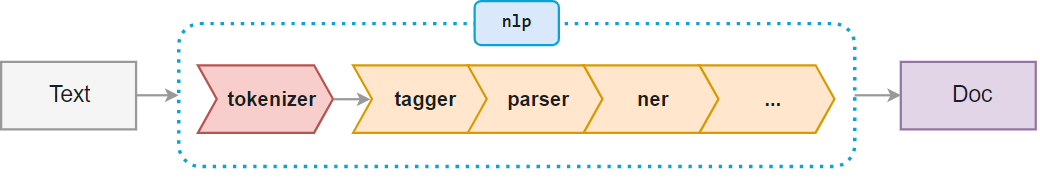
Los modelos incorporados con Spacy se pueden encontrar en su[ web](https://spacy.io/usage/facts-figures#benchmarks). Estos objetos permiten procesar documentos completos y extraer información de ellos como los tokens, PoS, o lemmas.

En primer lugar cargamos el modelo:

In [28]:
import spacy
# Cargamos el modelo preentrenado con textos en ingles ("en_core_web_sm")
nlp = spacy.load("en_core_web_sm") #

In [29]:
nlp

A continuación, agarramos el mismo subset de noticas y aplicamos el objeto nlp 

In [30]:
# Subset de noticas
subset_noticas = texto_noticias[0:100]
# Obtener una lista de objetos de tip ospacy
documento = nlp(subset_noticias[4]) # procesamos documento con nlp
print(type(documento))

<class 'spacy.tokens.doc.Doc'>


In [31]:
documento

Hotels in Maharashtra will train their staff to spot signs of sex trafficking, including frequent requests for bed linen changes and 'Do not disturb' signs left on room doors for days. A mobile phone app called Rescue Me, which will allow staff to alert police of suspicious behaviour, will be developed. The initiative has been backed by the Maharashtra government.

In [33]:
# Para multiples documentos
lista_documentos = [nlp(noticia) for noticia in subset_noticias]

Podemos segmentar el documento en frases

In [36]:
# Segmentar el texto  en oraciones
for num, sentence in enumerate(lista_documentos[4].sents):
    print(f"La oracion número {num} es: \n {sentence}")

La oracion número 0 es: 
 Hotels in Maharashtra will train their staff to spot signs of sex trafficking, including frequent requests for bed linen changes and 'Do not disturb' signs left on room doors for days.
La oracion número 1 es: 
 A mobile phone app called Rescue Me, which will allow staff to alert police of suspicious behaviour, will be developed.
La oracion número 2 es: 
 The initiative has been backed by the Maharashtra government.


In [38]:
# Ademas podemos dividir cada frase en tokens para la noticia 4
for num, sentence in enumerate(lista_documentos[4].sents):
    print(f'La oracion {num} tiene {len(sentence)} tokens')
    tokens = [word for word in sentence]
    print(tokens)

La oracion 0 tiene 35 tokens
[Hotels, in, Maharashtra, will, train, their, staff, to, spot, signs, of, sex, trafficking, ,, including, frequent, requests, for, bed, linen, changes, and, ', Do, not, disturb, ', signs, left, on, room, doors, for, days, .]
La oracion 1 tiene 23 tokens
[A, mobile, phone, app, called, Rescue, Me, ,, which, will, allow, staff, to, alert, police, of, suspicious, behaviour, ,, will, be, developed, .]
La oracion 2 tiene 10 tokens
[The, initiative, has, been, backed, by, the, Maharashtra, government, .]


## Tokenización

### Unigramas, Bigramas y N-gramas
En ocasiones, la información proporcionada por un token no es suficiente. <br> 
Existen palabras que tienen relación con los términos previos y/o posteriores <br>
Desde un punto de vista __naive__, la manera de conseguir el contexto de cada <br>
palabra es mediante los n-gramas. <br>
<br>
Los n-gramas son secuencias de n tokens consecutivos provenientes de un texto <br>
La combinación de n-gramas puede proporcionar información sobre la temática de <br>
un texto. Generalmente se generan unigramas, que son iguales que los tokens del texto. <br> 
Los Bigramas, que son combinaciones pareadas de tokens y los trigramas que son triadas de tokens.

### __NLTK__

En NLTK los ngrams se consiguen a través de un método dentro del módulo util de <br>
la librería.

In [43]:
from nltk.util import ngrams
?ngrams

Signature: ngrams(sequence, n, **kwargs)
Docstring:
Return the ngrams generated from a sequence of items, as an iterator.
For example:

    >>> from nltk.util import ngrams
    >>> list(ngrams([1,2,3,4,5], 3))
    [(1, 2, 3), (2, 3, 4), (3, 4, 5)]

Wrap with list for a list version of this function.  Set pad_left
or pad_right to true in order to get additional ngrams:

    >>> list(ngrams([1,2,3,4,5], 2, pad_right=True))
    [(1, 2), (2, 3), (3, 4), (4, 5), (5, None)]
    >>> list(ngrams([1,2,3,4,5], 2, pad_right=True, right_pad_symbol='</s>'))
    [(1, 2), (2, 3), (3, 4), (4, 5), (5, '</s>')]
    >>> list(ngrams([1,2,3,4,5], 2, pad_left=True, left_pad_symbol='<s>'))
    [('<s>', 1), (1, 2), (2, 3), (3, 4), (4, 5)]
    >>> list(ngrams([1,2,3,4,5], 2, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>'))
    [('<s>', 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, '</s>')]


:param sequence: the source data to be converted into ngrams
:type sequence: sequence or iter
:

Vamos a generar una función para crear n-grams de distinto tamaño.

In [44]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.util import ngrams
# Funcion para extraer n-grams de una frase.
def extraer_ngramas(datos, numero):
    # Uso Utilizar la función ngrams para generar ngrams de textos
    n_grams = ngrams(word_tokenize(datos), numero)
    # Transformo el resultado en una lista
    return [ ' '.join(grams) for grams in n_grams]

Ahora vamos a generar un conjunto de bigramas, trigramas y 4-gramas de la noticia 4:

In [45]:
subset_noticias = texto_noticias[0:100]

print("Unigramas: ", extraer_ngramas(subset_noticias[4], 1))

Unigramas:  ['Hotels', 'in', 'Maharashtra', 'will', 'train', 'their', 'staff', 'to', 'spot', 'signs', 'of', 'sex', 'trafficking', ',', 'including', 'frequent', 'requests', 'for', 'bed', 'linen', 'changes', 'and', "'Do", 'not', 'disturb', "'", 'signs', 'left', 'on', 'room', 'doors', 'for', 'days', '.', 'A', 'mobile', 'phone', 'app', 'called', 'Rescue', 'Me', ',', 'which', 'will', 'allow', 'staff', 'to', 'alert', 'police', 'of', 'suspicious', 'behaviour', ',', 'will', 'be', 'developed', '.', 'The', 'initiative', 'has', 'been', 'backed', 'by', 'the', 'Maharashtra', 'government', '.']


In [46]:
print("Bigramas: ", extraer_ngramas(subset_noticias[4], 2))
print("Trigramas: ", extraer_ngramas(subset_noticias[4], 3))
print("Cuatrigramas: ", extraer_ngramas(subset_noticias[4], 4))

Bigramas:  ['Hotels in', 'in Maharashtra', 'Maharashtra will', 'will train', 'train their', 'their staff', 'staff to', 'to spot', 'spot signs', 'signs of', 'of sex', 'sex trafficking', 'trafficking ,', ', including', 'including frequent', 'frequent requests', 'requests for', 'for bed', 'bed linen', 'linen changes', 'changes and', "and 'Do", "'Do not", 'not disturb', "disturb '", "' signs", 'signs left', 'left on', 'on room', 'room doors', 'doors for', 'for days', 'days .', '. A', 'A mobile', 'mobile phone', 'phone app', 'app called', 'called Rescue', 'Rescue Me', 'Me ,', ', which', 'which will', 'will allow', 'allow staff', 'staff to', 'to alert', 'alert police', 'police of', 'of suspicious', 'suspicious behaviour', 'behaviour ,', ', will', 'will be', 'be developed', 'developed .', '. The', 'The initiative', 'initiative has', 'has been', 'been backed', 'backed by', 'by the', 'the Maharashtra', 'Maharashtra government', 'government .']
Trigramas:  ['Hotels in Maharashtra', 'in Maharasht

### __Spacy__

No tiene actualmente integrado esta funcionalidad, así que utilizaremos una librería auxiliar que funciona con sus clases <br>
llamada textacy.<br>


In [48]:
import spacy
import textacy
# Cargamos el modelo preentrenado con textos en ingles ('en_core_web_sm')
nlp = spacy.load("en_core_web_sm")
subset_noticias = texto_noticias[0:100]
nlp_text = [nlp(texto_to_process) for texto_to_process in subset_noticias]

In [51]:
# Calculamos los bigramas trigramas y 4 gramas de la notica 4
print("Bigramas: ", list(textacy.extract.ngrams(nlp_text[4], 2, min_freq=1, filter_stops = False, filter_punct = False)))


Bigramas:  [Hotels in, in Maharashtra, Maharashtra will, will train, train their, their staff, staff to, to spot, spot signs, signs of, of sex, sex trafficking, trafficking,, , including, including frequent, frequent requests, requests for, for bed, bed linen, linen changes, changes and, and ', 'Do, Do not, not disturb, disturb', ' signs, signs left, left on, on room, room doors, doors for, for days, days., . A, A mobile, mobile phone, phone app, app called, called Rescue, Rescue Me, Me,, , which, which will, will allow, allow staff, staff to, to alert, alert police, police of, of suspicious, suspicious behaviour, behaviour,, , will, will be, be developed, developed., . The, The initiative, initiative has, has been, been backed, backed by, by the, the Maharashtra, Maharashtra government, government.]


In [55]:
print("Trigramas: ", list(textacy.extract.ngrams(nlp_text[4], 3, min_freq=1, filter_stops = False, filter_punct = False)))
print('\n')
print("4trigramas: ", list(textacy.extract.ngrams(nlp_text[4], 4, min_freq=1, filter_stops = False, filter_punct = False)))

Trigramas:  [Hotels in Maharashtra, in Maharashtra will, Maharashtra will train, will train their, train their staff, their staff to, staff to spot, to spot signs, spot signs of, signs of sex, of sex trafficking, sex trafficking,, trafficking, including, , including frequent, including frequent requests, frequent requests for, requests for bed, for bed linen, bed linen changes, linen changes and, changes and ', and 'Do, 'Do not, Do not disturb, not disturb', disturb' signs, ' signs left, signs left on, left on room, on room doors, room doors for, doors for days, for days., days. A, . A mobile, A mobile phone, mobile phone app, phone app called, app called Rescue, called Rescue Me, Rescue Me,, Me, which, , which will, which will allow, will allow staff, allow staff to, staff to alert, to alert police, alert police of, police of suspicious, of suspicious behaviour, suspicious behaviour,, behaviour, will, , will be, will be developed, be developed., developed. The, . The initiative, The i

## Visualización

Vamos a calcular los tokens y bigramas de todo el corpus de documentos y vamos a generar una visualización.

In [56]:
def frecuencia_tokens(lista):
    # Creamos diccionario vacio
    frecuencia = {}
    for item in lista:
        if (item in frecuencia):
            frecuencia[item] += 1
        else:
            frecuencia[item] = 1
    return frecuencia

Primero extraemos los tokens de todos los textos y los introducimos en una lista común.

In [57]:
lista_tokens = list()
for i in subset_noticias:
    tokens_document = word_tokenize(i)
    # Añadimos esos tokens como nuevos elementos
    lista_tokens.extend(tokens_document)

In [58]:
%%time
# Calculemos la frecuencia
dict_freq = frecuencia_tokens(lista_tokens)
dict_freq["Road"]

CPU times: total: 0 ns
Wall time: 1 ms


2

También podemos utilizar un counter (más eficiente).

In [ ]:
from collections import Counter

In [68]:
%%time
dict_freq2 = Counter(lista_tokens)
dict_freq2["Road"]

CPU times: total: 0 ns
Wall time: 0 ns


2

Ordenamos el diccionario para tomar sólo valores mayores a 20.

In [69]:
# Ordenamos el diccionario por frecuencia
dict_freq_order = sorted(dict_freq.items(), key=lambda x: x[1], reverse=True)
token_names = list()
token_freqs = list()
for i in dict_freq_order:
    if i[1] > 30:
        token_names.append(i[0])
        token_freqs.append(i[1])

C:\Users\eugen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '.'),
  Text(1, 0, 'the'),
  Text(2, 0, ','),
  Text(3, 0, 'a'),
  Text(4, 0, 'of'),
  Text(5, 0, 'to'),
  Text(6, 0, 'and'),
  Text(7, 0, 'in'),
  Text(8, 0, 'The'),
  Text(9, 0, 'on'),
  Text(10, 0, 'for'),
  Text(11, 0, 'said'),
  Text(12, 0, 'that'),
  Text(13, 0, 'has'),
  Text(14, 0, '``'),
  Text(15, 0, "''"),
  Text(16, 0, 'is'),
  Text(17, 0, 'was'),
  Text(18, 0, "'s"),
  Text(19, 0, 'by'),
  Text(20, 0, 'he'),
  Text(21, 0, 'it'),
  Text(22, 0, 'with'),
  Text(23, 0, 'as'),
  Text(24, 0, 'be')])

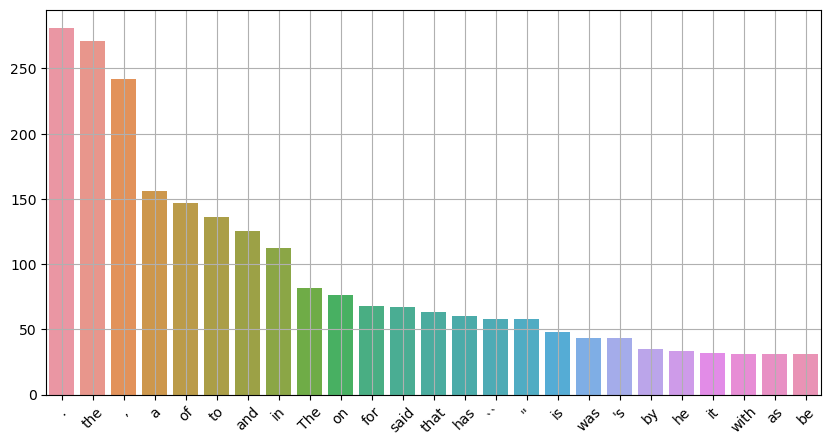

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
sns_g = sns.barplot(x=token_names, y=token_freqs)
plt.grid()
plt.xticks(rotation=45)

Se podrian quitar simbolos de puntacion y stopwords con:

In [72]:
import string
from nltk.corpus import stopwords
punctuations = string.punctuation
stop_words = stopwords.words('english')

In [74]:
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

## Lematización y Stemming
Los lemas son las formas canónicas del léxico de un idioma. <br> Por ejemplo, en el caso del español, los verbos presentan una flexión verbal, conocida comúnmente como conjugación, <br> utilizada para adaptar el verbo a diferentes <br> situaciones de contexto (número, género y tiempo verbal) y presentandolo distinta forma escrita. <br>
En algunas ocasiones, es útil utilizar el lema de los verbos <br> y otras palabras para reducir la dimensionalidad en los modelo predictivos. <br>

Un caso específico y simple de la lematización es el stemming <br> que consiste en utilizar reglas sintácticas para quitar la finalización de las palabras y reducirlas así <br> a una forma común llamada stem. Hay muchos stemmers populares como el de Porter o el de Snowball. <br> Es importante mencionar que no siempre que se hace stemming de una palabra <br> esta resulta en una palabra real, si no una palabra sin su última(s) letras. <br>
<br>
A continuación se muestras estos procesos tanto para NLTK como para Spacy.

## NLTK

### Stemming
En NLTK hay varias implementaciones de algoritmos de Stemming. Aquí mostraremos los dos más utilizados: <br>
- Algoritmo de Porter Stemming: Algoritmo que solo funciona en inglés y que funciona correctamente <br> con la mayoría de las palabras en ese idioma. Sirve para quitar, sustituir los sufijos de las palabras.
<br>
<br>
- Algoritmo de SnowballStemmer: Algoritmo de Stemming que soporta 13 lenguas en NLTK, incluyendo español. Es una versión <br> mejorada del algoritmo de Porter Stemming.

In [77]:
from nltk import word_tokenize
from nltk.stem import PorterStemmer, SnowballStemmer
# En Ingles
list_of_english_words = ["Speaking", "speaks", "Speaker",
                         "dogs", "buses", "pieces", "compute", 
                         "computer", "computing"]
SStemmer = PorterStemmer()

In [78]:
from nltk import word_tokenize
from nltk.stem import PorterStemmer, SnowballStemmer
list_of_english_words = ["Speaking", "speaks", "Speaker",
                         "dogs", "buses", "pieces", "compute", 
                         "computer", "computing"]
SStemer = PorterStemmer()
PStemmer = SnowballStemmer("english")
print("Terminos en ingles:")
for word in list_of_english_words:
    print("Palabra original: {}, Porter Stemmer: {}, Snowball {}".format(word, PStemmer.stem(word), SStemmer.stem(word)))

# Cargamos los Stemer



Terminos en ingles:
Palabra original: Speaking, Porter Stemmer: speak, Snowball speak
Palabra original: speaks, Porter Stemmer: speak, Snowball speak
Palabra original: Speaker, Porter Stemmer: speaker, Snowball speaker
Palabra original: dogs, Porter Stemmer: dog, Snowball dog
Palabra original: buses, Porter Stemmer: buse, Snowball buse
Palabra original: pieces, Porter Stemmer: piec, Snowball piec
Palabra original: compute, Porter Stemmer: comput, Snowball comput
Palabra original: computer, Porter Stemmer: comput, Snowball comput
Palabra original: computing, Porter Stemmer: comput, Snowball comput


In [81]:
lista_de_palabras = ["Hablando", "Habla", "Hablador", "Hablará", "ha hablado"]
SStemmer_spanish = SnowballStemmer("spanish")
print("Terminos en español:")
for word in lista_de_palabras:
    print(f"Palabra Original {word} Snowball {SStemmer_spanish.stem(word)}")

Terminos en español:
Palabra Original Hablando Snowball habl
Palabra Original Habla Snowball habl
Palabra Original Hablador Snowball hablador
Palabra Original Hablará Snowball habl
Palabra Original ha hablado Snowball ha habl


## Lemmatización
### Spacy
<br>
<br>
Debido al funcionamiento de Spacy, que funciona con modelos pre-entrenados, <br>
no existen funciones para hacer stemming y si para lematizar. Este proceso lo hace a partir de los conocimientos <br> adquiridos en el proceso de entrenamiento del modelo pre-entrenado.

In [83]:
import spacy
# Cargamos el modelos preentrenado con textos en inglés
nlp = spacy.load("en_core_web_sm")
english_sentence = "I bought five tickets on the internet, after a long wait 5 buses passed by, but none of them was the correct one"
word_sp = nlp(english_sentence)
# Accedemos al atributo de lematización de cada token
for word in word_sp:
    print(word.text, "--->", word.lemma_)

I ---> I
bought ---> buy
five ---> five
tickets ---> ticket
on ---> on
the ---> the
internet ---> internet
, ---> ,
after ---> after
a ---> a
long ---> long
wait ---> wait
5 ---> 5
buses ---> bus
passed ---> pass
by ---> by
, ---> ,
but ---> but
none ---> none
of ---> of
them ---> they
was ---> be
the ---> the
correct ---> correct
one ---> one


### Part-Of-Speech-Tagging

El Part-Of-Speech Tagging o la asignación de cateogrías grammaticales a una frase es el proceso en el que a una lista de palabras es etiquetada <br> en su categoría gramatical, es decir que identifica si la palabra es un nombre, un adjetivo, un verbo o un adverbio etc... 
<br>
<br>
La asignación de etiquetas grammaticales es interesante cuando se quiere hacer análisis gramatical de una oración, para saber si una palabra <br> tiene una acepación u otra, o incluso para extraer caracteristicas artificiales cuando se quiere hacer una clasificación textual o similar.

In [86]:
#nltk.help.upenn_tagset()
from nltk import pos_tag
from nltk.tokenize import word_tokenize

subset_noticias = texto_noticias[0:100]
# Segmentamos los tokens
tokens = word_tokenize(subset_noticias[4])
# Utilizamos la funcion pos_tag() para obtener etiquetas
pos_tag(tokens)

[('Hotels', 'NNS'),
 ('in', 'IN'),
 ('Maharashtra', 'NNP'),
 ('will', 'MD'),
 ('train', 'VB'),
 ('their', 'PRP$'),
 ('staff', 'NN'),
 ('to', 'TO'),
 ('spot', 'VB'),
 ('signs', 'NNS'),
 ('of', 'IN'),
 ('sex', 'NN'),
 ('trafficking', 'NN'),
 (',', ','),
 ('including', 'VBG'),
 ('frequent', 'JJ'),
 ('requests', 'NNS'),
 ('for', 'IN'),
 ('bed', 'NN'),
 ('linen', 'NN'),
 ('changes', 'NNS'),
 ('and', 'CC'),
 ("'Do", 'MD'),
 ('not', 'RB'),
 ('disturb', 'VB'),
 ("'", "''"),
 ('signs', 'NNS'),
 ('left', 'VBD'),
 ('on', 'IN'),
 ('room', 'NN'),
 ('doors', 'NNS'),
 ('for', 'IN'),
 ('days', 'NNS'),
 ('.', '.'),
 ('A', 'DT'),
 ('mobile', 'JJ'),
 ('phone', 'NN'),
 ('app', 'NN'),
 ('called', 'VBN'),
 ('Rescue', 'NNP'),
 ('Me', 'NNP'),
 (',', ','),
 ('which', 'WDT'),
 ('will', 'MD'),
 ('allow', 'VB'),
 ('staff', 'NN'),
 ('to', 'TO'),
 ('alert', 'VB'),
 ('police', 'NN'),
 ('of', 'IN'),
 ('suspicious', 'JJ'),
 ('behaviour', 'NN'),
 (',', ','),
 ('will', 'MD'),
 ('be', 'VB'),
 ('developed', 'VBN'),
 ('.',

In [87]:
# Segmentamos tokens
tokens = nlp(subset_noticias[4])
for w in tokens:
    print("The word {} is a {}".format(w.text, w.pos_))

The word Hotels is a NOUN
The word in is a ADP
The word Maharashtra is a PROPN
The word will is a AUX
The word train is a VERB
The word their is a PRON
The word staff is a NOUN
The word to is a PART
The word spot is a VERB
The word signs is a NOUN
The word of is a ADP
The word sex is a NOUN
The word trafficking is a NOUN
The word , is a PUNCT
The word including is a VERB
The word frequent is a ADJ
The word requests is a NOUN
The word for is a ADP
The word bed is a NOUN
The word linen is a NOUN
The word changes is a NOUN
The word and is a CCONJ
The word ' is a PUNCT
The word Do is a AUX
The word not is a PART
The word disturb is a VERB
The word ' is a PUNCT
The word signs is a NOUN
The word left is a VERB
The word on is a ADP
The word room is a NOUN
The word doors is a NOUN
The word for is a ADP
The word days is a NOUN
The word . is a PUNCT
The word A is a DET
The word mobile is a ADJ
The word phone is a NOUN
The word app is a NOUN
The word called is a VERB
The word Rescue is a PROPN
Th

## Name-Entity Recognition
La extracción de entidades de un documento es una labor esencial en la análitica de textos. <br>
En alguna ocasiones puede ser interesante si se nombra a una persona, a una ciudad, un país o incluso a un medicamento, en el caso de los textos clínicos.
<br>
<br>
Existen sistemas NER (Named-entity recognition) especifícos para cada campo de aplicación. Las librerías de NLTK y Spacy disponen de <br>
modelos para detectar entidades de ámbito general, aunque existen modelos mucho más especificos para reconocer entididas muy especificas como por ejemplo síntomas en textos clínicos (mención a BSC). 
<br>
<br>
En NLTK antes de detectar es necesario la obtención de la tokenización y la POS tag antes de identificar entidades ya que utiliza las etiquetas <br> POS  y reglas internas para encontrar que elementos son personas u otro tipo de entidad. <br> 
<br>
Cuando los textos son extraidos de internet, hay que quitar los espacios extras que puede haber en una frase, para que se extraiga mejor las categorías gramaticales de éstos y poder así reconocer <br> mejor las organizaciones o personas en el texto. En este caso están bastante limpios así que no hace falta hacerlo.
<br>
<br> 
Importamos la función ne_chunk, que necesita un conjunto de tokens etiquetados PoS previamente. Así que antes hay que preprocesar el <br>
documento lo haremos con la función preprocesar().

In [88]:
from nltk.chunk import ne_chunk
?ne_chunk

Signature: ne_chunk(tagged_tokens, binary=False)
Docstring:
Use NLTK's currently recommended named entity chunker to
chunk the given list of tagged tokens.
File:      c:\users\eugen\anaconda3\lib\site-packages\nltk\chunk\__init__.py
Type:      function

In [90]:
from nltk.chunk import ne_chunk
def preprocess(documento):
    # Word Tokenizer
    documento_tok = word_tokenize(documento) # Word tokenize
    # Pos tag
    documento_pos = pos_tag(documento_tok)
    return documento_pos

noticia  = preprocess(subset_noticias[4])
noticia[0:5]

[('Hotels', 'NNS'),
 ('in', 'IN'),
 ('Maharashtra', 'NNP'),
 ('will', 'MD'),
 ('train', 'VB')]

In [91]:
# Utilizamos esa salida para observar la presencia de entidades nombradas
ne_tree = ne_chunk(noticia)
print(ne_tree)

(S
  Hotels/NNS
  in/IN
  (GPE Maharashtra/NNP)
  will/MD
  train/VB
  their/PRP$
  staff/NN
  to/TO
  spot/VB
  signs/NNS
  of/IN
  sex/NN
  trafficking/NN
  ,/,
  including/VBG
  frequent/JJ
  requests/NNS
  for/IN
  bed/NN
  linen/NN
  changes/NNS
  and/CC
  'Do/MD
  not/RB
  disturb/VB
  '/''
  signs/NNS
  left/VBD
  on/IN
  room/NN
  doors/NNS
  for/IN
  days/NNS
  ./.
  A/DT
  mobile/JJ
  phone/NN
  app/NN
  called/VBN
  (PERSON Rescue/NNP Me/NNP)
  ,/,
  which/WDT
  will/MD
  allow/VB
  staff/NN
  to/TO
  alert/VB
  police/NN
  of/IN
  suspicious/JJ
  behaviour/NN
  ,/,
  will/MD
  be/VB
  developed/VBN
  ./.
  The/DT
  initiative/NN
  has/VBZ
  been/VBN
  backed/VBN
  by/IN
  the/DT
  (GPE Maharashtra/NNP)
  government/NN
  ./.)


En spacy es mucho más sencillo. Cuando procesamos un documento con el modelo importado, automáticamente se le aplica a un conjunt ode instrucciones <br> internamente para detectar tokens, lemas... y también las entidades nombradas, a las que se puede acceder iterando sobre el atributo ents y <br> extrayendo la etiqueta.

In [94]:
tokens = nlp("John was born in Chicken, Alaska and studies at Cranberry Lemon University. John likes to go to Starbucks.")
print([(X.text, X.label_) for X in tokens.ents])

[('John', 'PERSON'), ('Chicken', 'GPE'), ('Alaska', 'GPE'), ('Cranberry Lemon University', 'ORG'), ('John', 'PERSON'), ('Starbucks', 'ORG')]


Además Spacy incorpora un módulo para visualizar estas entidades en un gráfico.

In [95]:
from spacy import displacy
displacy.render(tokens, jupyter=True, style='ent')

## Estructura de la frase

In [96]:
from spacy import displacy
tokens = nlp("John was born in Chicken, Alaska and studies at Cranberry Lemon University. John likes to go to Starbucks.")
displacy.render(tokens, style='dep', jupyter=True)

## Word Net
WordNet 3.0 es un diccionario jerárquico desarrollado por la Universidad de Princeton, que categoríza las acepciones de todas las palabras <br> del inglés en relaciones semánticas con otras. <br>
<br>
Se puede acceder fácilmente a Wordnet utilizando NLTK mediante la función wordnet del módulo corpus.
<br>
Por ejemplo, busquemos la palabra "bank".


In [97]:
from nltk.corpus import wordnet
syn = wordnet.synsets("bank")
print(syn)

[Synset('bank.n.01'), Synset('depository_financial_institution.n.01'), Synset('bank.n.03'), Synset('bank.n.04'), Synset('bank.n.05'), Synset('bank.n.06'), Synset('bank.n.07'), Synset('savings_bank.n.02'), Synset('bank.n.09'), Synset('bank.n.10'), Synset('bank.v.01'), Synset('bank.v.02'), Synset('bank.v.03'), Synset('bank.v.04'), Synset('bank.v.05'), Synset('deposit.v.02'), Synset('bank.v.07'), Synset('trust.v.01')]


In [100]:
print("bank.n.01 definition: " + syn[0].definition())
print("bank.n.02 definition: " + syn[1].definition())
print("bank.n.03 definition: " + syn[2].definition())

bank.n.01 definition: sloping land (especially the slope beside a body of water)
bank.n.02 definition: a financial institution that accepts deposits and channels the money into lending activities
bank.n.03 definition: a long ridge or pile
